# Load and Analyze the Dataset

In [1]:
import pandas as pd

# Load datasets
train_data = pd.read_csv('train_product_data.csv')
test_data = pd.read_csv('test_data.csv')
test_results = pd.read_csv('test_results.csv')

# Display the first few rows of the training dataset
print(train_data.head())

                            uniq_id            crawl_timestamp  \
0  c2d766ca982eca8304150849735ffef9  2016-03-25 22:59:23 +0000   
1  f449ec65dcbc041b6ae5e6a32717d01b  2016-03-25 22:59:23 +0000   
2  0973b37acd0c664e3de26e97e5571454  2016-03-25 22:59:23 +0000   
3  ce5a6818f7707e2cb61fdcdbba61f5ad  2016-03-25 22:59:23 +0000   
4  29c8d290caa451f97b1c32df64477a2c  2016-03-25 22:59:23 +0000   

                                         product_url  \
0  http://www.flipkart.com/alisha-solid-women-s-c...   
1  http://www.flipkart.com/aw-bellies/p/itmeh4grg...   
2  http://www.flipkart.com/alisha-solid-women-s-c...   
3  http://www.flipkart.com/alisha-solid-women-s-c...   
4  http://www.flipkart.com/dilli-bazaaar-bellies-...   

                                        product_name product_category_tree  \
0                Alisha Solid Women's Cycling Shorts             Clothing    
1                                         AW Bellies             Footwear    
2                Alisha Solid Wo

# Exploratory Data Analysis (EDA)

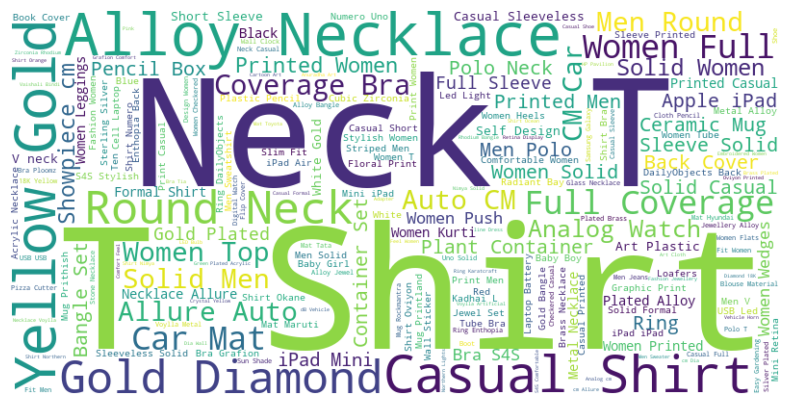

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Plotting a word cloud for product names
product_names = ' '.join(train_data['product_name'].astype(str).values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(product_names)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Data Preprocessing

In [3]:
from sklearn.preprocessing import LabelEncoder

# Handling missing values
train_data = train_data.fillna('')

# Encoding the target variable
label_encoder = LabelEncoder()
train_data['product_category'] = label_encoder.fit_transform(train_data['product_category_tree'])

# Feature Engineering

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combining text features for TF-IDF
text_features = train_data['product_name'] + ' ' + train_data['description']
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(text_features)

# Target variable
y = train_data['product_category']

# Data Splitting

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)

# Addressing Class Imbalance

In [6]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Building the Model

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Naive Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_smote, y_train_smote)
y_pred_nb = nb_model.predict(X_val)

# Evaluation
print("Naive Bayes Classifier")
print("Accuracy:", accuracy_score(y_val, y_pred_nb))
print("F1 Score:", f1_score(y_val, y_pred_nb, average='weighted'))
print("Precision:", precision_score(y_val, y_pred_nb, average='weighted'))
print("Recall:", recall_score(y_val, y_pred_nb, average='weighted'))

Naive Bayes Classifier
Accuracy: 0.9644444444444444
F1 Score: 0.9679434348379279
Precision: 0.9744707598240115
Recall: 0.9644444444444444


# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Grid search for SVM
svm_model = SVC()
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters
print("Best parameters for SVM:", grid_search.best_params_)

# Evaluation on Test Data

In [ ]:
# Preprocess test data similarly
test_text_features = test_data['product_name'] + ' ' + test_data['description']
X_test = tfidf_vectorizer.transform(test_text_features)
y_test = label_encoder.transform(test_results['product_category_tree'])

# Predict on test data
y_test_pred = grid_search.best_estimator_.predict(X_test)

# Evaluation
print("Test Data Evaluation")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred, average='weighted'))
print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_test_pred, average='weighted'))
